El mejor coeficiente fue: 32.96943153848707


Text(0.5, 0, '$\\lambda$')

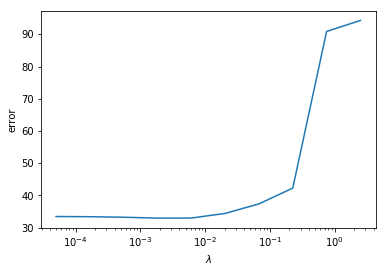

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut 
%matplotlib inline

data = pd.read_csv('Cars93.csv')
X = data[['MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Passengers','Length','Wheelbase', 'Width', 'Turn.circle', 'Weight']].values
Y = data['Price'].values.reshape(-1,1)

loo = LeaveOneOut()
loo.get_n_splits(X)


N=10
l=5*np.logspace(-5,-0.3,N) ##lambda
co=[]
for i in l:
    linear = sklearn.linear_model.Lasso(i,normalize=True)
    er=[]
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        linear.fit(X_train,Y_train)
        er.append(mean_squared_error(linear.predict(X_test), Y_test))
    med=np.mean(np.asarray(er))
    co.append(med)

coef=np.asarray(co)
mp=coef[np.argmin(coef)]
print('El mejor coeficiente fue:',mp)
plt.semilogx(l,co)
plt.ylabel('error')
plt.title('Primera grafica')
plt.xlabel(r'$\lambda$')
        
        
    



[array([ 2.60446402e-02, -2.63617803e-01,  1.21274231e+00,  1.50656651e-01,
       -2.66086529e-03,  2.73955816e-03,  9.65087402e-02, -1.43095592e+00,
        1.14493043e-01,  6.40693226e-01, -1.50045513e+00, -5.23091922e-01,
        5.18009085e-04]), array([ 1.89961424e-02, -2.57365688e-01,  1.21455036e+00,  1.50512033e-01,
       -2.64468291e-03,  2.74206812e-03,  9.49113657e-02, -1.42352465e+00,
        1.13616233e-01,  6.39594162e-01, -1.49671256e+00, -5.22037035e-01,
        5.24550635e-04]), array([ 0.00000000e+00, -2.40331930e-01,  1.21735729e+00,  1.50090494e-01,
       -2.59494204e-03,  2.74246361e-03,  9.04907241e-02, -1.40055047e+00,
        1.11079113e-01,  6.36090792e-01, -1.48456388e+00, -5.18512624e-01,
        5.38385155e-04]), array([-0.00000000e+00, -2.37062026e-01,  1.17494374e+00,  1.49412641e-01,
       -2.48340526e-03,  2.63229299e-03,  8.76324343e-02, -1.35335302e+00,
        1.07858506e-01,  6.26542354e-01, -1.44656961e+00, -5.05771379e-01,
        4.90793958e-0

Text(0.5, 0, '$\\lambda$')

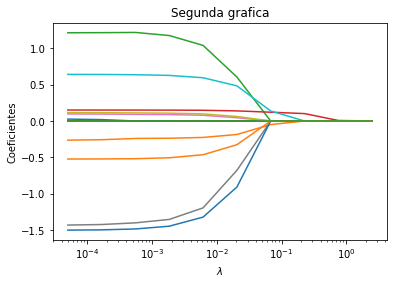

In [76]:
cop=[]
for i in l:
    linear = sklearn.linear_model.Lasso(i,normalize=True)
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        linear.fit(X_train,Y_train)
    cop.append(linear.coef_)
    
 
plt.semilogx(l,cop)
plt.ylabel('Coeficientes')
plt.title('Segunda grafica')
plt.xlabel(r'$\lambda$')